## Representación estadistica y análisis de datos con dos variables numéricas conjuntas

Una herramienta util para analizar dos datos es el diagrama de dispersión, por ejemplo las alturas de las versiones de godzilla con el peso de cada versión

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


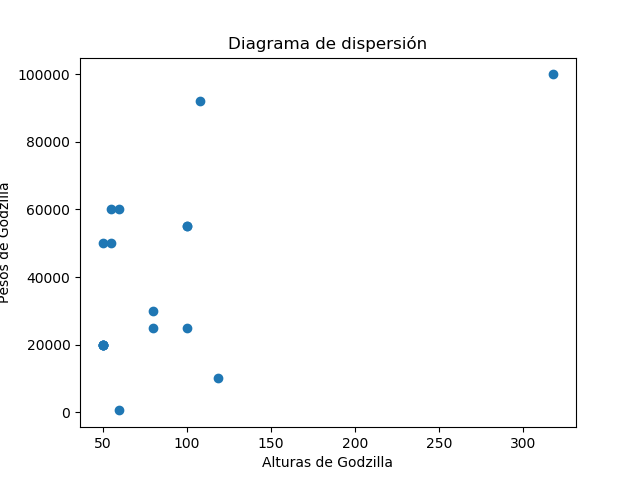

In [6]:
datos = pd.DataFrame()
datos["altura"] = [50,50,50,50,50,50,55,55,60,60,80,80,100,100,100,108,118.5,318]
datos["peso"] = [20000,20000,20000,20000,20000,50000,50000,60000,60000,500,25000,30000,25000,55000,55000
                 ,92000,10000,100000]
plt.title("Diagrama de dispersión")
plt.xlabel("Alturas de Godzilla")
plt.ylabel("Pesos de Godzilla")
plt.scatter(datos.altura,datos.peso)

## Construcción de la recta de ajuste
Algebraicamente podemos construir una recta de la forma $y=a+bx$ en donde a es la ordenada al origen, utilizaremos el siguiente sistema para construir la recta de ajuste: <br><br>
$\sum_{i=1}^{n}y_i = na+b\sum_{i=1}^{n}x_i$ <br>
$\sum_{i=1}^{n}y_ix_i = a\sum_{i=1}^{n}x_i + b\sum_{i=1}^{n}x_i^2$ <br><br>
Para esta caso las $"x"$ son los valores de las alturas y las $"y"$ son los valores de los pesos.<br>


In [10]:
datos["xy"] = datos.altura * datos.peso
datos["x_cuadrado"] = pow(datos.altura,2)
datos["y_cuadrado"] = pow(datos.peso,2)
datos.head(20)

,altura,peso,xy,x_cuadrado,y_cuadrado
0,50.0,20000,1000000.0,2500.00,400000000
1,50.0,20000,1000000.0,2500.00,400000000
2,50.0,20000,1000000.0,2500.00,400000000
3,50.0,20000,1000000.0,2500.00,400000000
4,50.0,20000,1000000.0,2500.00,400000000
5,50.0,50000,2500000.0,2500.00,2500000000
6,55.0,50000,2750000.0,3025.00,2500000000
7,55.0,60000,3300000.0,3025.00,3600000000
8,60.0,60000,3600000.0,3600.00,3600000000
9,60.0,500,30000.0,3600.00,250000


In [11]:
import numpy as np
suma_x = np.sum(datos.altura)
suma_y = np.sum(datos.peso)
suma_xy = np.sum(datos.xy)
suma_x_cuadrado = np.sum(datos.x_cuadrado)
suma_y_cuadrado = np.sum(datos.y_cuadrado)
print(suma_x,suma_y,suma_xy,suma_x_cuadrado,suma_y_cuadrado)

1534.5 712500 78001000.0 197880.25 40964250000


Finalmente la ecuación queda de la siguiente manera<br><br>
$712500 = 18a + 1534.5b$ <br>
$78001000 = 1534.5a + 197880.25b$<br><br>
Al solucionar el sistema obtenemos los siguientes valores de a y de b:<br><br>
$a = 17642.4377 \ \ \ b = 257.37121$<br><br>
Por tanto nuestra recta de ajuste será:<br><br> 
$y=17624.4377 + 257.37121x$<br><br>
$peso=17624.4377 + 257.37121*altura$

<IPython.core.display.Javascript object>


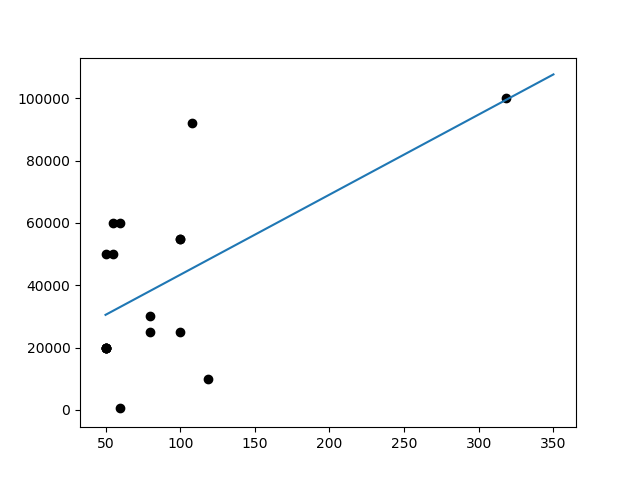

In [20]:
peso = [17624.4377+257.37121*altura for altura in range(50,400,50)]
altura = [altura for altura in range(50,400,50)]
plt.plot(altura,peso)
plt.scatter(datos.altura, datos.peso,color="black")

Una ventaja de esta recta de ajuste es que podemos hacer predicciones del peso de godzilla dada una altura. Está recta se conoce como recta de minimos cuadrados

## Coeficiente de correlación

Medida que indica que tan bien se ajustan nuestra recta a los datos. Si el coeficiente decorrelación es cercano a 1 o -1 se indica que los datos se ajustan de forma adecuada a la recta, pero si es cercano a 0 indica que los datos no se ajustan a está recta. <br><br>
El coeficiente de correlación se calcula con la siguiente formula: <br><br>
$r = \dfrac{n\sum_{i=1}^{n}x_iy_i - \sum_{i=1}^{n}x_i \sum_{i=1}^{n}y_i}
{\sqrt{ \left[n*\left(\sum_{i=1}^{n}x_i^2\right)-\left(\sum_{i=1}^{n}x_i\right)^2\right] \left[n*\left(\sum_{i=1}^{n}y_i^2 \right) - \left(\sum_{i=1}^{n}y_i \right)^2 \right]} }$

In [21]:
import math
r = (18*suma_xy-suma_x*suma_y)/(math.sqrt((18*suma_x_cuadrado-pow(suma_x,2))*(18*suma_y_cuadrado-pow(suma_y,2))))
r

0.5900116870347245

## Limitaciones
<ul>
    <li>Si queremos utilizar la recta de ajuste para hacer predicciones tenemos que utilizar valores cercanos a los utilizados para la construcción del modelo.</li>
</ul>

## Estimaciones
<ul>
    <li>Las variables pueden relacionarse con una recta, una ecuación cuadratica, logaritmica, etc.</li>
    <li>Que dos variables se correlacionen no indica causalidad ni dependencia, solamente significa que ambas varian de la misma forma.</li>
</ul>

## Datos quiz de clase

In [24]:
import pandas as pd
datos = pd.read_csv("Pesos.csv")
datos.head(20)
datos = datos.fillna(0)

In [25]:
datos.head(20)

,Peso,Longitud
0,20000.0,122.0
1,20000.0,100.0
2,20000.0,100.0
3,20000.0,100.0
4,20000.0,100.0
5,50000.0,190.0
6,50000.0,190.0
7,60000.0,200.0
8,60000.0,200.0
9,500.0,120.0


In [27]:
datos["xy"] = datos.Peso * datos.Longitud
datos["x_cuadrada"] = pow(datos.Peso,2)
datos["y_cuadrada"] = pow(datos.Longitud,2)

In [28]:
import numpy as np
suma_x = np.sum(datos.Peso)
suma_y = np.sum(datos.Longitud)
suma_xy = np.sum(datos.xy)
suma_x_cuadrada = np.sum(datos.x_cuadrada)
suma_y_cuadrada = np.sum(datos.y_cuadrada)
print(suma_x, suma_y, suma_xy, suma_x_cuadrada, suma_y_cuadrada)

602500.0 2594.0 119931000.0 30864250000.0 491861.5


$$2594 = 16*a + 602500*b$$
$$119931000 = 602500*a + 30834250000*b$$
$$r = 0.921$$
$$y = 60+0.00272x$$

## Tablas de contingencia
Estás tablas surgen bajo la necesidad de querer analizar dos variables de tipo cualitativo.<br><br>
Problema: Lewis Dodgson tenía 18 amigas. Nueve eran rubias y nueve morenas, once tenían los ojos oscuros y siete tenían los ojos azules. ¡Ah, y seis eran rubias y de ojos oscuros!. ¿cómo eran todas las amigas del profesor Dodgson?. <br><br>
Construimos una tabla de contingencia:
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-9wq8{border-color:inherit;text-align:center;vertical-align:middle}
.tg .tg-nrix{text-align:center;vertical-align:middle}
.tg .tg-xwyw{border-color:#000000;text-align:center;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-9wq8" colspan="2" rowspan="2">Amigas</th>
    <th class="tg-9wq8" colspan="2">Cabello</th>
    <th class="tg-nrix"></th>
  </tr>
  <tr>
    <td class="tg-9wq8">Moreno</td>
    <td class="tg-9wq8">Rubio</td>
    <td class="tg-nrix"></td>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-9wq8" rowspan="2">Ojos</td>
    <td class="tg-9wq8">Azules</td>
    <td class="tg-9wq8">4</td>
    <td class="tg-9wq8">3</td>
    <td class="tg-nrix">7</td>
  </tr>
  <tr>
    <td class="tg-9wq8">Oscuros</td>
    <td class="tg-9wq8">5</td>
    <td class="tg-9wq8">6</td>
    <td class="tg-nrix">11</td>
  </tr>
  <tr>
    <td class="tg-xwyw"></td>
    <td class="tg-xwyw"></td>
    <td class="tg-xwyw">9</td>
    <td class="tg-xwyw">9</td>
    <td class="tg-xwyw">18</td>
  </tr>
</tbody>
</table>

### Representaciones
Podemos obtener representaciones en terminos de porcentajes podemos calcular las frecuencias relativas de cada uno de los valores de está tabla.